# Introdução

Este notebook tem como objetivo a análise e modelagem de um conjunto de dados de clientes com o intuito de desenvolver um modelo preditivo capaz de estimar a probabilidade de inadimplência para novas solicitações de crédito.

O objetivo inicial é realizar uma análise exploratória dos dados, a fim de identificar possíveis relações entre as variáveis e obter insights relevantes para o problema em questão. Posteriormente, serão aplicadas técnicas de pré-processamento nos dados, incluindo tratamento de outliers, imputação de valores ausentes e manipulação das variáveis (feature engineering). 

Após isso, serão utilizados diversos modelos de aprendizado de máquina baseados em árvores de decisão, uma vez que eles possuem uma maior interpretabilidade, o que é importante para o problema em questão. Dessa forma, será possível justificar a concessão ou não de crédito para um cliente com base em suas características.

Após a etapa de treinamento dos modelos, será realizada a avaliação de cada um deles, com o objetivo de determinar o modelo que apresenta o melhor desempenho para a base de dados em questão. A avaliação será feita com base em métricas de avaliação de modelos, como acurácia, precisão, recall, F1-score, entre outras, considerando as particularidades do problema de previsão de inadimplência de crédito.

## Importando bibliotecas

Vamos importar bibliotecas que fornecem funcionalidades para realizar as tarefas de pré-processamento de dados, visualização e criação de modelos de Machine Learning.

In [ ]:
# manipulação de dados
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

# visualização
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# pré-processamento
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.utils import resample
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Fine Tuning
from sklearn.model_selection import RandomizedSearchCV

## Importando dados

Serão realizadas as importações das bases de dados "treino.csv" e "teste.csv" para serem utilizadas no treinamento e previsão do modelo de machine learning. A base de dados original será armazenada em uma variável para permitir modificações e será criada uma cópia para preservar a base de dados original.

In [ ]:
treino_original = pd.read_csv(r'D:\Downloads\case_datarisk\treino.csv')
teste_original = pd.read_csv(r'D:\Downloads\case_datarisk\teste.csv')

## Definição de funções auxiliares

-----
# Análise Exploratória

Nesta etapa, será realizada uma análise exploratória de dados (EDA), cujo objetivo é obter uma compreensão inicial dos dados, a fim de identificar padrões, tendências e relacionamentos entre as variáveis. A análise incluirá o cálculo de estatísticas descritivas, como média, desvio padrão e valores mínimos e máximos, bem como a visualização dos dados por meio de gráficos, como histogramas, boxplots e scatterplots. Esta etapa é importante para identificar possíveis problemas nos dados, como valores ausentes, outliers e distribuições, e para orientar as decisões de pré-processamento e seleção de recursos.

## Primeiras Impressões

Nesta etapa inicial, é importante obter uma compreensão geral dos dados e das características dos datasets, a fim de identificar possíveis problemas e oportunidades para a análise exploratória de dados.

In [ ]:
treino_original.head()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
teste_original.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0


In [ ]:
treino_original.shape, teste_original.shape

((110000, 11), (40000, 10))

Uma observação relevante é que a primeira base de dados apresenta um tamanho de 110000 registros, o que representa uma quantidade adequada para a construção de conjuntos de treinamento e teste para a elaboração de modelos de machine learning.

In [ ]:
treino_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   inadimplente                           110000 non-null  int64  
 1   util_linhas_inseguras                  110000 non-null  float64
 2   idade                                  110000 non-null  int64  
 3   vezes_passou_de_30_59_dias             110000 non-null  int64  
 4   razao_debito                           110000 non-null  float64
 5   salario_mensal                         88237 non-null   float64
 6   numero_linhas_crdto_aberto             110000 non-null  int64  
 7   numero_vezes_passou_90_dias            110000 non-null  int64  
 8   numero_emprestimos_imobiliarios        110000 non-null  int64  
 9   numero_de_vezes_que_passou_60_89_dias  110000 non-null  int64  
 10  numero_de_dependentes                  107122 non-null  

In [ ]:
teste_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   util_linhas_inseguras                  40000 non-null  float64
 1   idade                                  40000 non-null  int64  
 2   vezes_passou_de_30_59_dias             40000 non-null  int64  
 3   razao_debito                           40000 non-null  float64
 4   salario_mensal                         32032 non-null  float64
 5   numero_linhas_crdto_aberto             40000 non-null  int64  
 6   numero_vezes_passou_90_dias            40000 non-null  int64  
 7   numero_emprestimos_imobiliarios        40000 non-null  int64  
 8   numero_de_vezes_que_passou_60_89_dias  40000 non-null  int64  
 9   numero_de_dependentes                  38954 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 3.1 MB


Observa-se que os datasets em questão é composto por 10 atributos referentes a cada cliente. Além disso, é possível notar que o conjunto de treino contém um atributo alvo que será utilizado para definir se o cliente é inadimplente ou não.

Nesta etapa, iniciaremos as modificações necessárias nos conjuntos de dados. Serão criadas cópias das bases de dados para preservar a originalidade, a fim de que seja possível renomear algumas colunas para padronização e reordenar a ordem das colunas. Isso visa facilitar a compreensão dos dados

In [ ]:
# gera cópias dos datasets originais
treino = treino_original.copy()
teste = teste_original.copy()


# renomeia as colunas indicadas
treino.rename(columns={'vezes_passou_de_30_59_dias': 'passou_30_59_dias', 
                   'numero_vezes_passou_90_dias': 'passou_90_dias',
                   'numero_de_vezes_que_passou_60_89_dias': 'passou_60_89_dias'}, inplace=True)

teste.rename(columns={'vezes_passou_de_30_59_dias': 'passou_30_59_dias', 
                   'numero_vezes_passou_90_dias': 'passou_90_dias',
                   'numero_de_vezes_que_passou_60_89_dias': 'passou_60_89_dias'}, inplace=True)


# reordena as colunas
treino = treino.reindex(columns=['inadimplente',
                        'idade',
                        'numero_de_dependentes',
                        'salario_mensal',
                        'razao_debito',
                        'numero_linhas_crdto_aberto',
                        'numero_emprestimos_imobiliarios',
                        'util_linhas_inseguras',
                        'passou_30_59_dias',
                        'passou_60_89_dias',
                        'passou_90_dias'])

teste = teste.reindex(columns=[ 'idade',
                        'numero_de_dependentes',
                        'salario_mensal',
                        'razao_debito',
                        'numero_linhas_crdto_aberto',
                        'numero_emprestimos_imobiliarios',
                        'util_linhas_inseguras',
                        'passou_30_59_dias',
                        'passou_60_89_dias',
                        'passou_90_dias'])

A seguir, um resumo estatístico das variáveis contidas no conjunto de dados. Este resumo inclui informações como média, desvio padrão, valor mínimo e máximo, bem como quartis (25%, 50% e 75%) e a contagem de valores não nulos. 

In [ ]:
treino.describe()

,inadimplente,idade,numero_de_dependentes,salario_mensal,razao_debito,numero_linhas_crdto_aberto,numero_emprestimos_imobiliarios,util_linhas_inseguras,passou_30_59_dias,passou_60_89_dias,passou_90_dias
count,110000.000000,110000.000000,107122.000000,8.823700e+04,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,0.066645,52.255636,0.757482,6.637411e+03,354.823589,8.445573,1.019891,5.929979,0.424055,0.243891,0.269955
std,0.249408,14.768241,1.114670,1.338395e+04,2074.140421,5.139026,1.135989,252.301965,4.240780,4.204137,4.217326
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,3.400000e+03,0.175016,5.000000,0.000000,0.030054,0.000000,0.000000,0.000000
50%,0.000000,52.000000,0.000000,5.400000e+03,0.366682,8.000000,1.000000,0.155936,0.000000,0.000000,0.000000
75%,0.000000,63.000000,1.000000,8.225000e+03,0.866874,11.000000,2.000000,0.562806,0.000000,0.000000,0.000000
max,1.000000,109.000000,20.000000,3.008750e+06,329664.000000,58.000000,54.000000,50708.000000,98.000000,98.000000,98.000000


In [ ]:
teste.describe()

,idade,numero_de_dependentes,salario_mensal,razao_debito,numero_linhas_crdto_aberto,numero_emprestimos_imobiliarios,util_linhas_inseguras,passou_30_59_dias,passou_60_89_dias,passou_90_dias
count,40000.000000,38954.000000,3.203200e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,52.404025,0.756508,6.760602e+03,348.004166,8.472525,1.013700,6.374199,0.412725,0.230750,0.255025
std,14.781468,1.116244,1.683639e+04,1934.436246,5.164960,1.112494,242.617247,4.057899,4.017506,4.034327
min,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,3.400000e+03,0.175360,5.000000,0.000000,0.029362,0.000000,0.000000,0.000000
50%,52.000000,0.000000,5.409500e+03,0.366172,8.000000,1.000000,0.149491,0.000000,0.000000,0.000000
75%,63.000000,1.000000,8.284000e+03,0.872253,11.000000,2.000000,0.549762,0.000000,0.000000,0.000000
max,109.000000,13.000000,1.794060e+06,307001.000000,57.000000,25.000000,22000.000000,98.000000,98.000000,98.000000


## Descrição das Variáveis

Segue abaixo a descrição de cada coluna do dataset de treino. Vale ressaltar que o dataset de teste contém as mesmas colunas com exceção da coluna `inadimplente`.

* `inadimplente`: se o cliente é (1) ou não (0) inadimplente. Esta é a variável alvo.
* `idade`: idade do cliente. Inteiro.
* `numero_de_dependentes`: O número de pessoas dependentes do cliente. Espera-se que seja um número inteiro. Há alguns valores ausentes.
* `salario_mensal`: Salário mensal do cliente. Float. Há diversos valores ausentes.
* `razao_debito`: Razão entre as dívidas e o patrimônio do tomador. razão débito = Dividas/Patrimônio. Float.
* `numero_linhas_crdto_aberto`: Número de empréstimos em aberto pelo cliente. Número inteiro
* `numero_emprestimos_imobiliarios`: Quantidade de empréstimos imobiliários que o cliente possui em aberto. Número inteiro
* `util_linhas_inseguras`: quanto que o cliente está usando, relativamente ao limite dele, de linhas de crédito que não são seguradas por qualquer bem do tomador e.g: imoveis, carros etc. Float. 
* `passou_30_59_dias`: Número de vezes que o cliente atrasou, entre 30 e 59 dias, o pagamento de um empréstimo. Inteiro.
* `passou_60_89_dias`: Número de vezes que o cliente atrasou, entre 60 e 89 dias, o pagamento de um empréstimo. Número inteiro.
* `passou_90_dias`: Número de vezes que o tomador passou mais de 90 dias em atraso. Número inteiro.

## Visualização das variáveis

Nessa seção, serão utilizados gráficos apropriados para cada variável separadamente, a fim de obter observações relevantes para a preparação dos dados. Serão utilizados métodos estatísticos para a identificação de outliers, distribuição das variáveis e relações entre as variáveis. A partir dessas observações, serão definidas as transformações necessárias nos dados para a preparação dos modelos de Machine Learning.

### `inadimplente`

Como mencionado anteriormente, a variável determina se o cliente está inadimplente ou não, sendo que 0 significa que não está inadimplente e 1 significa que está inadimplente.

Vamos analisar as estatísticas descritivas e utilizar o gráfico de barras para visualizar. 

In [ ]:
treino['inadimplente'].describe()

count    110000.000000
mean          0.066645
std           0.249408
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: inadimplente, dtype: float64

In [ ]:
# gera a porcentagem dos valores que aparecem na coluna
treino['inadimplente'].value_counts(1) * 100

0    93.335455
1     6.664545
Name: inadimplente, dtype: float64

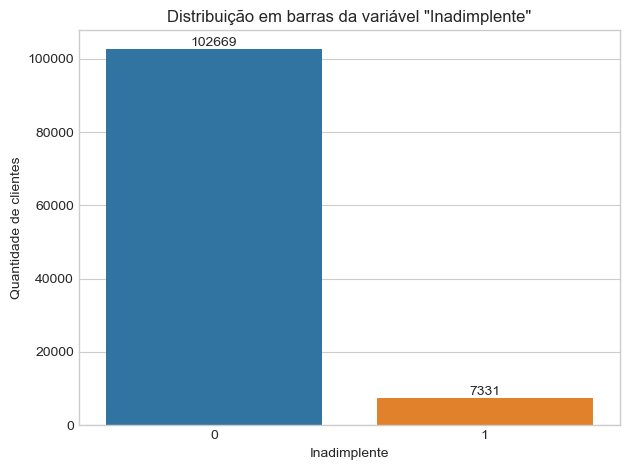

In [ ]:
ax = sns.countplot(x='inadimplente', data=treino)
ax.bar_label(ax.containers[0]);
ax.set_title('Distribuição em barras da variável "Inadimplente"')
ax.set_xlabel("Inadimplente")
ax.set_ylabel("Quantidade de clientes")
plt.tight_layout()

Através da análise,  observa-se uma discrepância considerável entre a quantidade de clientes que estão em situação de inadimplência e os que estão em situação de adimplência. 

Tal cenário caracteriza um problema comum em machine learning denominado de "desbalanceamento de dados", que consiste em uma situação em que há uma quantidade significativamente maior de exemplos de uma classe em relação à outra. Nesse contexto, a tarefa de classificação pode ser comprometida devido à tendência do modelo em priorizar a classe majoritária, ignorando a classe minoritária, o que pode levar a resultados imprecisos ou até mesmo enviesados.

Inicialmente, serão considerados modelos de machine learning sem realizar qualquer tipo de balanceamento das classes, a fim de verificar o desempenho e os resultados obtidos. Posteriormente, será aplicado um tratamento específico para balancear as classes, com o intuito de avaliar a efetividade e possíveis melhorias no desempenho dos modelos. Será realizada uma comparação entre os resultados obtidos antes e após o tratamento para balanceamento das classes.

### `idade`

Representa a idade do cliente. 

In [ ]:
treino['idade'].describe()

count    110000.000000
mean         52.255636
std          14.768241
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: idade, dtype: float64

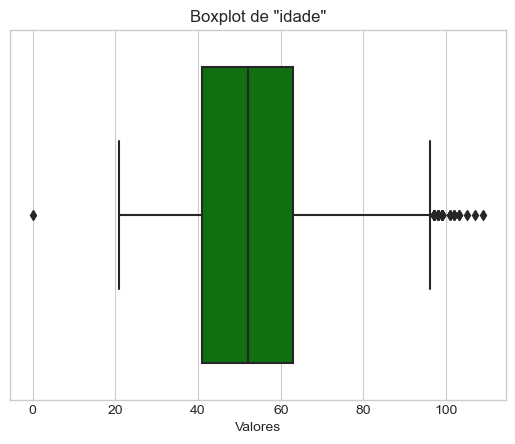

In [ ]:
sns.boxplot(x='idade', data = treino, color='green')
plt.title('Boxplot de "idade"')
plt.xlabel('Valores')
plt.show()

É possível reparar que há alguns outliers nessa variável, como por exemplo, uma idade de 0 anos. Portanto, devem ser tratados.

Vamos plotar o histograma da variável.

In [ ]:
treino['idade'].value_counts()

48     2794
49     2788
46     2759
47     2718
50     2709
       ... 
103       2
107       1
105       1
0         1
109       1
Name: idade, Length: 86, dtype: int64

In [ ]:
sns.displot(x='idade', data = treino[(treino['idade'] > primeiro_quarto - 1.5 * iqr) & (treino['idade'] < terceiro_quarto + 1.5 * iqr)], color='green')
plt.title('Histograma de "idade"')
plt.xlabel('Valores')
plt.ylabel('Quantidade')
plt.show()

NameError: name 'primeiro_quarto' is not defined

Vamos colocar um limite inferior de 19 anos e um limite superior de 95 e ver quantas entradas estão fora desse intervalo.

In [ ]:
treino[(treino.idade < 19) | (treino.idade > 95)]

Vejamos que não há muitos valores fora desse intervalo, portanto, há poucos outliers em comparação ao conjunto inteiro.

### `numero_de_dependentes`

Representa o número de pessoas dependentes do cliente. Espera-se que seja um número inteiro. Vamos analisar.

In [ ]:
treino['numero_de_dependentes'].describe()

In [ ]:
ax = sns.boxplot(x='numero_de_dependentes', data = treino, color='green')
plt.title('Boxplot de "numero_de_dependentes"')
plt.xlabel('Valores')
plt.show()

In [ ]:
treino['numero_de_dependentes'].value_counts(ascending=False)

Os valores contidos na variável são todos inteiros, condizentes com a natureza da variável. Procederemos com a plotagem dos dados.

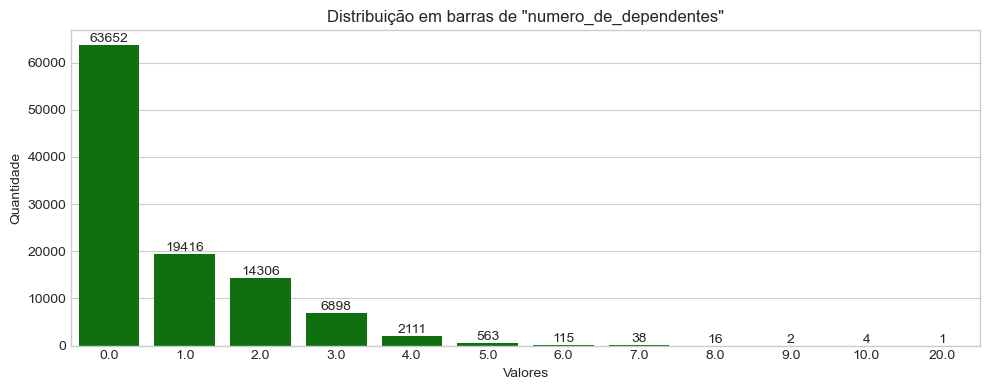

In [ ]:
fig = plt.subplots(figsize=(10,4))
ax = sns.countplot(x='numero_de_dependentes', data = treino, color='green')
ax.bar_label(ax.containers[0]);
ax.set_title('Distribuição em barras de "numero_de_dependentes"')
ax.set_xlabel('Valores')
ax.set_ylabel('Quantidade')
plt.tight_layout()

Vamos visualizar alguns outliers para ver se há alguma informação interessante.

In [ ]:
treino[treino['numero_de_dependentes']>7]

,inadimplente,idade,numero_de_dependentes,salario_mensal,razao_debito,numero_linhas_crdto_aberto,numero_emprestimos_imobiliarios,util_linhas_inseguras,passou_30_59_dias,passou_60_89_dias,passou_90_dias
1342,0,74,8.0,9305.0,0.375672,8,5,0.047198,0,0,0
6299,0,40,20.0,6316.0,0.576539,11,1,0.226616,1,0,2
9241,0,41,8.0,7000.0,0.180260,7,1,0.475976,0,0,0
10618,0,44,10.0,12896.0,0.035590,5,0,0.000000,0,0,0
12982,0,39,10.0,4833.0,0.027100,6,0,0.325828,0,0,0
14388,0,50,8.0,4800.0,0.090606,2,1,1.000000,0,0,0
18802,1,39,8.0,1785.0,0.124300,6,0,1.078335,2,0,1
22698,0,43,10.0,0.0,3621.000000,9,1,0.139466,1,0,0
25052,0,35,8.0,9000.0,0.087213,8,0,0.115809,0,0,0
27179,0,44,8.0,10124.0,0.244049,6,3,0.006473,0,0,0


Apenas um indimplente nesse conjunto.

In [ ]:
teste['numero_de_dependentes'].isnull().sum()

1046

Há alguns valores ausentes no conjunto de teste, portanto, deve haver algum tratamento com esses valores.

### `salario_mensal`

Representa o valor do salário mensal do cliente. É uma variável float.

Vamos tomar algumas análises:

In [ ]:
treino['salario_mensal'].describe()

count    8.823700e+04
mean     6.637411e+03
std      1.338395e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.225000e+03
max      3.008750e+06
Name: salario_mensal, dtype: float64

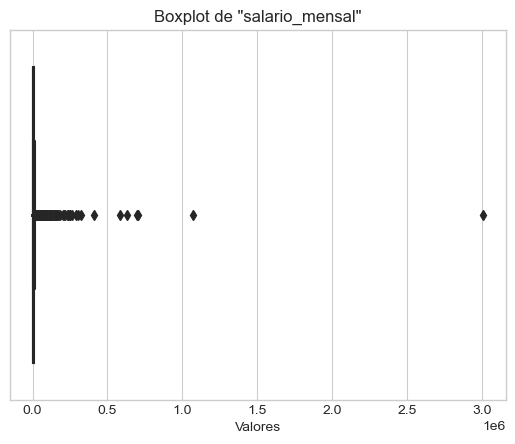

In [ ]:
ax = sns.boxplot(x='salario_mensal', data = treino, color='green')
plt.title('Boxplot de "salario_mensal"')
plt.xlabel('Valores')
plt.show()

É possível reparar que há diversos outliers e um valor que é extremamente discrepante, algo que até impossibilita a visualização do intervalo interquartílico.

Plotando o histograma:

In [ ]:
treino['salario_mensal'].value_counts()

5000.0     2035
4000.0     1605
6000.0     1437
3000.0     1291
0.0        1216
           ... 
791.0         1
2368.0        1
10691.0       1
12555.0       1
12224.0       1
Name: salario_mensal, Length: 12228, dtype: int64

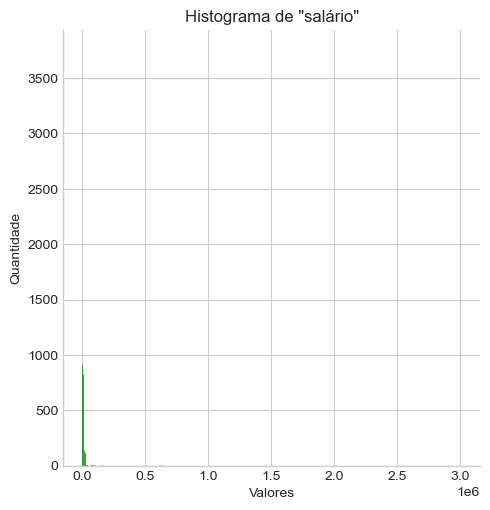

In [ ]:
sns.displot(x='salario_mensal', data = treino, color='green')
plt.title('Histograma de "salário"')
plt.xlabel('Valores')
plt.ylabel('Quantidade')
plt.show()

Os outliers dificultam a visualização dos dados, como pode ser visto também no histograma da variável.

Vamos plotar a variável eliminando os outliers temporariamente utilizando uma técnica bastante conhecida. O objetivo é obter uma visualização mais clara da distribuição da variável, sem a presença de valores extremos que possam distorcê-la.

In [ ]:
primeiro_quartil = treino['salario_mensal'].quantile(0.25)
terceiro_quartil = treino['salario_mensal'].quantile(0.75)
iqr = terceiro_quartil - primeiro_quartil

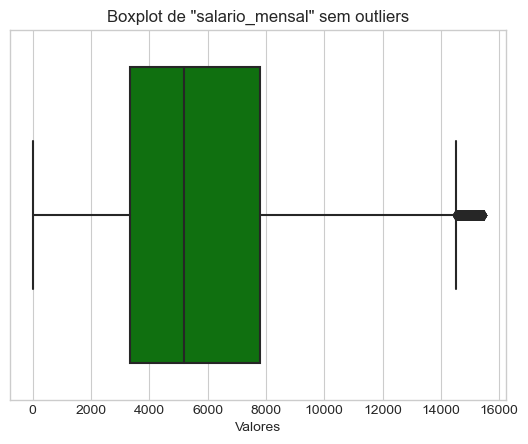

In [ ]:
ax = sns.boxplot(x='salario_mensal', data = treino[(treino['salario_mensal'] > primeiro_quartil - 1.5 * iqr) & (treino['salario_mensal'] < terceiro_quartil + 1.5 * iqr)], color='green')
plt.title('Boxplot de "salario_mensal" sem outliers')
plt.xlabel('Valores')
plt.show()

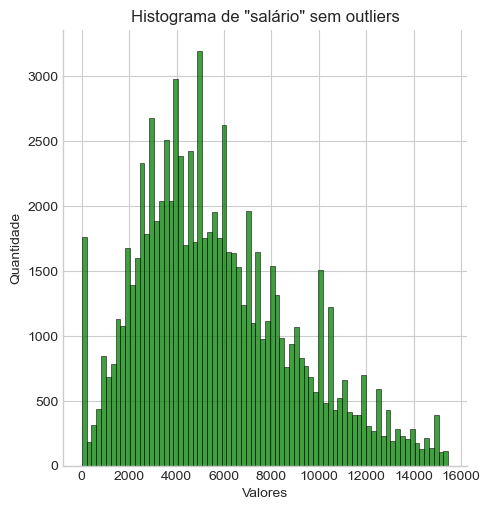

In [ ]:
sns.displot(x='salario_mensal', data = treino[(treino['salario_mensal'] > primeiro_quartil - 1.5 * iqr) & (treino['salario_mensal'] < terceiro_quartil + 1.5 * iqr)], color='green')
plt.title('Histograma de "salário" sem outliers')
plt.xlabel('Valores')
plt.ylabel('Quantidade')
plt.show()

Analisando o histograma da variável em questão, é perceptível que há uma frequência maior de ocorrências em determinadas faixas de valores. Possivelmente isso ocorre pois são faixas de valores "arrendondados", como 2000, 3000, 4500, 5000 etc.

Visualizando alguns outliers para tentar encontrar alguma observação interessante.

In [ ]:
treino[treino['salario_mensal'] >100000]

,inadimplente,idade,numero_de_dependentes,salario_mensal,razao_debito,numero_linhas_crdto_aberto,numero_emprestimos_imobiliarios,util_linhas_inseguras,passou_30_59_dias,passou_60_89_dias,passou_90_dias
266,0,43,1.0,208333.0,0.009691,11,1,0.007983,1,0,0
3427,0,56,0.0,110775.0,0.038005,12,2,0.404801,0,0,0
4043,0,94,0.0,203500.0,0.000039,5,0,0.007390,0,0,0
7107,0,51,4.0,142000.0,0.021373,15,2,0.177333,0,0,0
17373,0,34,0.0,251608.0,0.004304,6,1,1.000000,1,0,0
17439,0,72,1.0,128000.0,0.024297,18,2,0.257346,0,0,0
17597,0,57,1.0,235000.0,0.025366,7,2,0.000000,0,0,0
18841,0,65,1.0,131350.0,0.043441,17,1,0.162101,0,0,0
20648,0,50,1.0,148000.0,0.002845,2,0,0.392817,1,0,0
21479,0,43,1.0,125000.0,0.019136,9,0,0.955441,0,0,0


Há poucos inadimplentes dentro desse conjunto de outliers.

In [ ]:
treino['salario_mensal'].isnull().sum()

21763

A variável possui muitas entradas ausentes, portanto, deve haver algum tratamento.

In [ ]:
teste['salario_mensal'].isnull().sum()

7968

Aqui também há valores ausentes no conjunto de teste.

### `razao_debito`

Representa a razão entre as dívidas e o patrimônio do tomador. razão débito = Dividas/Patrimônio. Variável float.

In [ ]:
treino['razao_debito'].describe()

count    110000.000000
mean        354.823589
std        2074.140421
min           0.000000
25%           0.175016
50%           0.366682
75%           0.866874
max      329664.000000
Name: razao_debito, dtype: float64

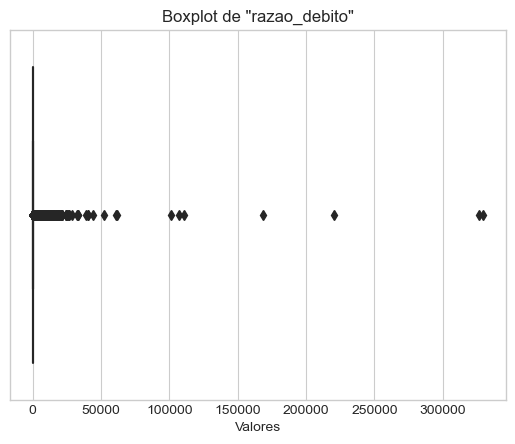

In [ ]:
ax = sns.boxplot(x='razao_debito', data = treino, color='green')
plt.title('Boxplot de "razao_debito"')
plt.xlabel('Valores')
plt.show()

Ao ver o gráfico e as estatísticas descritivas é visível que há também muitos outliers nessa coluna. Utilizando a mesma técnica para remover temporariamente os outliers

In [ ]:
primeiro_quartil = treino['razao_debito'].quantile(0.25)
terceiro_quartil = treino['razao_debito'].quantile(0.75)
iqr = terceiro_quartil - primeiro_quartil
treino[(treino['razao_debito'] < primeiro_quartil - 1.5*iqr) | (treino['razao_debito'] > terceiro_quartil + 1.5*iqr)]

,inadimplente,idade,numero_de_dependentes,salario_mensal,razao_debito,numero_linhas_crdto_aberto,numero_emprestimos_imobiliarios,util_linhas_inseguras,passou_30_59_dias,passou_60_89_dias,passou_90_dias
6,0,57,0.0,NaN,5710.0,8,3,0.305682,0,0,0
8,0,27,NaN,NaN,46.0,2,0,0.116951,0,0,0
14,0,76,0.0,0.0,477.0,6,1,0.019657,0,0,0
16,0,78,0.0,NaN,2058.0,10,2,0.061086,0,0,0
32,0,62,0.0,NaN,977.0,6,1,0.083418,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109980,0,80,0.0,NaN,35.0,0,0,1.000000,0,0,0
109986,0,84,0.0,NaN,5734.0,5,1,0.938906,0,0,0
109990,0,60,0.0,NaN,1619.0,7,1,0.535453,0,0,0
109993,0,59,0.0,NaN,2389.0,6,1,0.102095,0,0,0


Vejamos que há um número enorme de outliers, utilizando uma das técnicas de remoção. Analinando a quantidade de inadimplentes entre esses clientes:

In [ ]:
treino[(treino['razao_debito'] < primeiro_quartil - 1.5*iqr) | (treino['razao_debito'] > terceiro_quartil + 1.5*iqr)].inadimplente.isnull().sum()

0

É no mínimo intrigante não haver nenhum inadimplente, considerando que todos possuem uma razão muito grande entre as dívidas e o patrimônio.

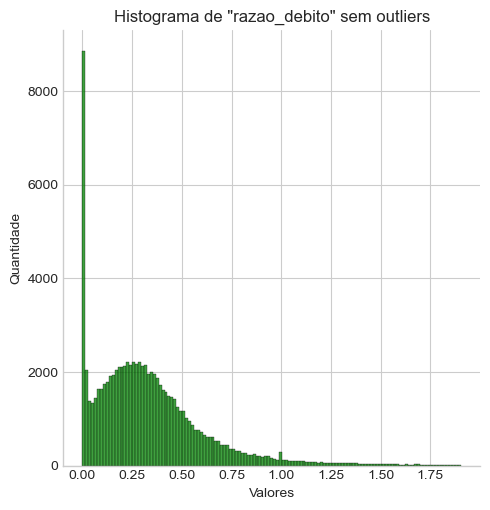

In [ ]:
ax = sns.displot(x='razao_debito', data = treino[(treino['razao_debito'] > primeiro_quartil - 1.5*iqr) & (treino['razao_debito'] < terceiro_quartil + 1.5*iqr)], color='green')
plt.title('Histograma de "razao_debito" sem outliers')
plt.xlabel('Valores')
plt.ylabel('Quantidade')
plt.show()

### `numero_linhas_crdto_aberto`

Como foi visto, é o número de empréstimos em aberto pelo cliente, portanto, é um número inteiro. Vamos analisar algumas estastísticas:

In [ ]:
treino['numero_linhas_crdto_aberto'].describe()

count    110000.000000
mean          8.445573
std           5.139026
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: numero_linhas_crdto_aberto, dtype: float64

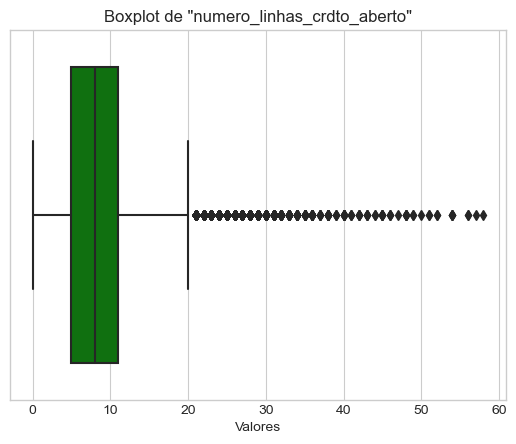

In [ ]:
ax = sns.boxplot(x='numero_linhas_crdto_aberto', data = treino, color='green')
plt.title('Boxplot de "numero_linhas_crdto_aberto"')
plt.xlabel('Valores')
plt.show()

Há alguns outliers na variável mas nenhum que seja capaz de distorcer completamente o gráfico.

In [ ]:
treino['numero_linhas_crdto_aberto'].value_counts()

6     9988
7     9675
5     9521
8     9171
4     8512
9     8240
10    7095
3     6652
11    6107
12    5122
2     4915
13    4163
14    3373
1     3252
15    2661
16    2173
17    1738
18    1428
0     1419
19    1037
20     847
21     649
22     522
23     394
24     313
25     221
26     164
27     138
28     111
29      91
30      62
31      58
32      37
33      31
34      21
36      17
35      13
38      11
40       8
37       5
45       5
48       5
54       4
43       4
42       4
39       3
46       3
41       3
56       2
49       2
52       2
51       2
44       2
58       1
57       1
47       1
50       1
Name: numero_linhas_crdto_aberto, dtype: int64

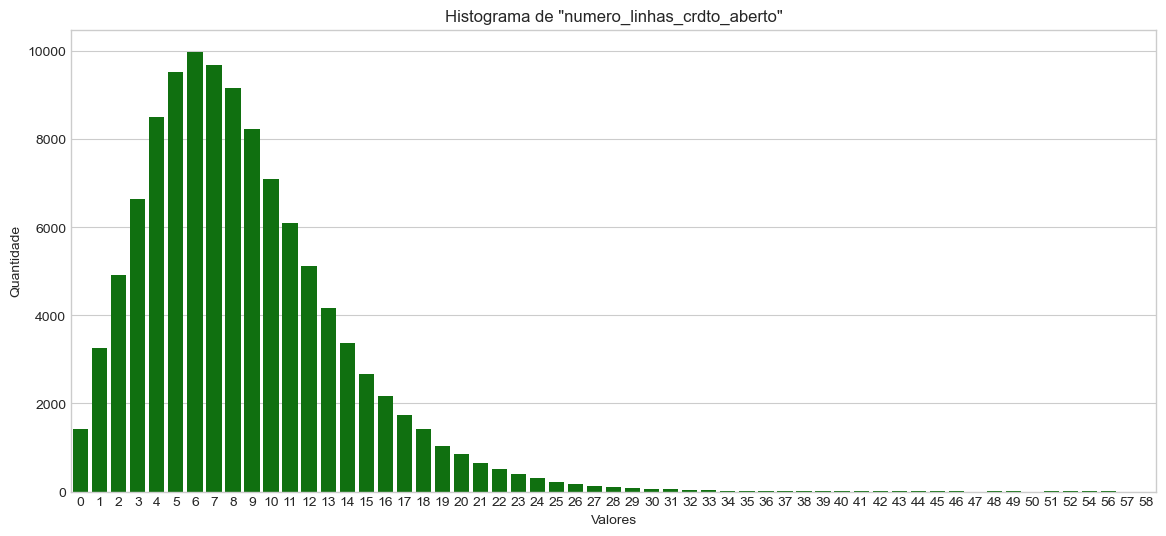

In [ ]:
fig = plt.subplots(figsize=(14,6))
sns.countplot(x='numero_linhas_crdto_aberto', data = treino, color='green')
plt.title('Histograma de "numero_linhas_crdto_aberto"')
plt.xlabel('Valores')
plt.ylabel('Quantidade')
plt.show()

### `numero_emprestimos_imobiliarios`

Quantidade de empréstimos imobiliários que o cliente possui em aberto, logo, é um número inteiro. Visualizando:

In [ ]:
treino.numero_emprestimos_imobiliarios.describe()

count    110000.000000
mean          1.019891
std           1.135989
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: numero_emprestimos_imobiliarios, dtype: float64

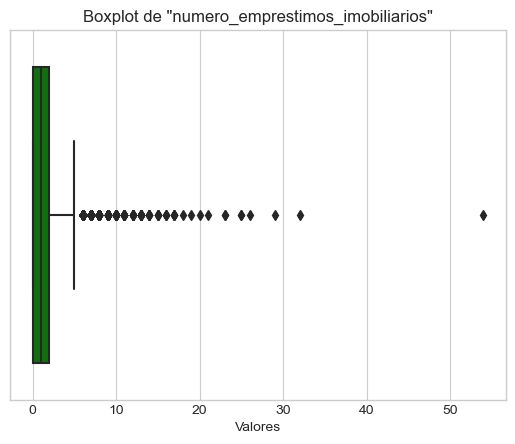

In [ ]:
ax = sns.boxplot(x='numero_emprestimos_imobiliarios', data = treino, color='green')
plt.title('Boxplot de "numero_emprestimos_imobiliarios"')
plt.xlabel('Valores')
plt.show()

In [ ]:
treino.numero_emprestimos_imobiliarios.value_counts()

0     41159
1     38354
2     23161
3      4644
4      1601
5       496
6       237
7       126
8        67
9        58
10       29
11       15
13       13
12       10
14        6
15        5
17        4
16        3
23        2
25        2
26        1
54        1
21        1
18        1
29        1
19        1
20        1
32        1
Name: numero_emprestimos_imobiliarios, dtype: int64

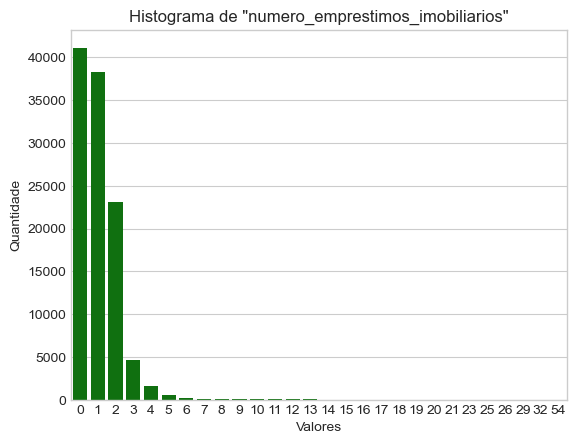

In [ ]:
sns.countplot(x='numero_emprestimos_imobiliarios', data = treino, color='green')
plt.title('Histograma de "numero_emprestimos_imobiliarios"')
plt.xlabel('Valores')
plt.ylabel('Quantidade')
plt.show()

Também há outliers mas que não prejudicam a visualização. Dando uma olhada nas entradas com valores discrepantes:

In [ ]:
treino[treino.numero_emprestimos_imobiliarios > 15]

,inadimplente,idade,numero_de_dependentes,salario_mensal,razao_debito,numero_linhas_crdto_aberto,numero_emprestimos_imobiliarios,util_linhas_inseguras,passou_30_59_dias,passou_60_89_dias,passou_90_dias
2495,1,48,2.0,12080.0,2.511961,29,17,0.451376,0,0,0
14789,0,50,3.0,16666.0,1.861943,28,16,0.160269,0,0,0
18259,0,61,1.0,48000.0,0.429449,33,26,0.635363,6,0,1
30587,0,53,0.0,8000.0,5.967504,58,54,0.003032,0,0,0
31517,0,38,0.0,33334.0,0.505055,29,21,0.060621,0,0,0
36922,0,67,0.0,10000.0,3.489351,29,18,0.065387,0,0,0
46102,0,76,0.0,NaN,52112.000000,27,23,0.003928,0,0,0
47172,0,62,0.0,NaN,14136.000000,29,17,0.129095,0,0,0
62192,0,73,0.0,14500.0,3.593683,26,23,0.002280,0,0,0
63506,0,50,0.0,65000.0,0.323426,24,17,0.610639,1,0,0


### `util_linhas_inseguras`

Como vimos, é a variável que representa o quanto que o cliente está usando, relativamente ao limite dele, de linhas de crédito que não são seguradas por qualquer bem do tomador e.g: imoveis, carros etc. Ou seja, é de se esperar que seja uma porcentagem, portanto, um valor entre 0 e 1. 

É uma variável float. Vamos fazer algumas visualizações como boxplot e histograma.

In [ ]:
treino['util_linhas_inseguras'].describe()

count    110000.000000
mean          5.929979
std         252.301965
min           0.000000
25%           0.030054
50%           0.155936
75%           0.562806
max       50708.000000
Name: util_linhas_inseguras, dtype: float64

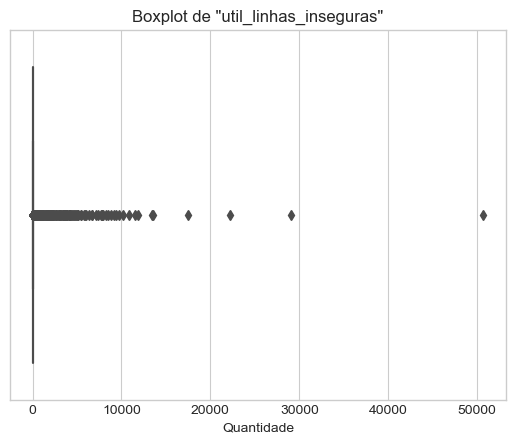

In [ ]:
sns.boxplot(x = 'util_linhas_inseguras', data=treino, color='blue')
plt.title('Boxplot de "util_linhas_inseguras"')
plt.xlabel('Quantidade')
plt.show()

Por meio da análise descritiva com a função describe e do gráfico de boxplot, foi constatado que a variável apresenta uma quantidade significativa de outliers, visto que 75% dos dados estão abaixo de 0.562806 e há diversos valores acima de 1, o que é inesperado já que se espera valores no intervalo de 0 a 1. Consequentemente, será necessário realizar um tratamento nos dados, com o objetivo de lidar com os outliers identificados.

Será realizada a plotagem dos gráficos de boxplot e histograma, contudo, os valores da variável que ultrapassam o limite superior de 1 serão temporariamente removidos, visando observar o comportamento dos dados que estão dentro do intervalo de valores esperados.

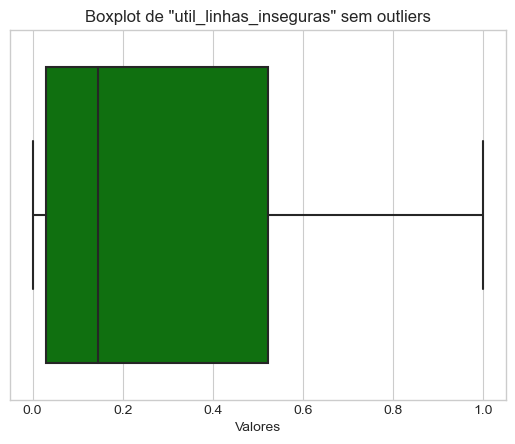

In [ ]:
sns.boxplot(x='util_linhas_inseguras', data = treino[treino['util_linhas_inseguras']<=1], color='green')
plt.title('Boxplot de "util_linhas_inseguras" sem outliers')
plt.xlabel('Valores')
plt.show()

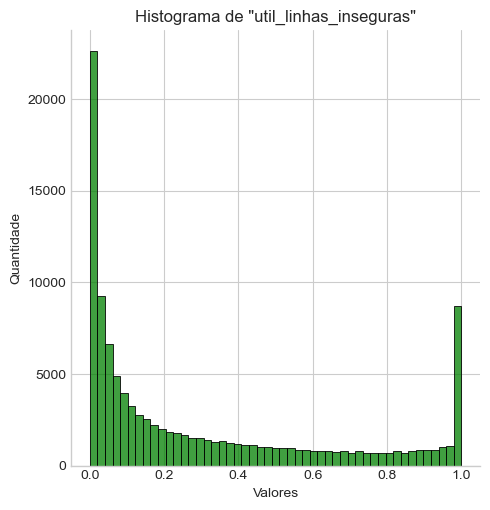

In [ ]:
sns.displot(x='util_linhas_inseguras', data = treino[treino['util_linhas_inseguras']<=1], color='green')
plt.title('Histograma de "util_linhas_inseguras"')
plt.xlabel('Valores')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
treino[treino['util_linhas_inseguras']>1].inadimplente.sum()

897

Há uma quantidade significativa de clientes inadimplentes que possuam valores inesperados para `util_linhas_inseguras` e portanto não serão excluídos da análise, uma vez que a classe inadimplente já possui poucos elemtentos.

### `passou_30_59_dias`

Como visto anteriormente, é o número de vezes que o cliente atrasou, entre 30 e 59 dias, o pagamento de um empréstimo. É um número inteiro.

In [ ]:
treino.passou_30_59_dias.describe()

count    110000.000000
mean          0.424055
std           4.240780
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: passou_30_59_dias, dtype: float64

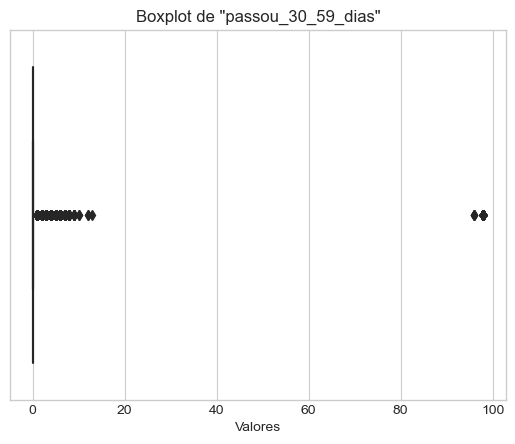

In [ ]:
ax = sns.boxplot(x='passou_30_59_dias', data = treino, color='green')
plt.title('Boxplot de "passou_30_59_dias"')
plt.xlabel('Valores')
plt.show()

In [ ]:
treino.passou_30_59_dias.value_counts()

0     92469
1     11726
2      3343
3      1304
4       541
5       246
98      198
6        98
7        41
8        17
9         8
96        4
10        2
12        2
13        1
Name: passou_30_59_dias, dtype: int64

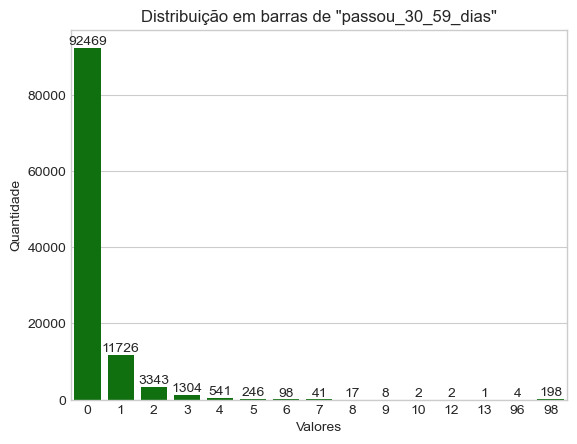

In [ ]:
ax = sns.countplot(x='passou_30_59_dias', data = treino, color='green')
ax.bar_label(ax.containers[0]);
plt.title('Distribuição em barras de "passou_30_59_dias"')
plt.xlabel('Valores')
plt.ylabel('Quantidade')
plt.show()

### `passou_60_89_dias`

Número de vezes que o cliente atrasou, entre 60 e 89 dias, o pagamento de um empréstimo. Número inteiro.

In [ ]:
treino.passou_60_89_dias.describe()

count    110000.000000
mean          0.243891
std           4.204137
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: passou_60_89_dias, dtype: float64

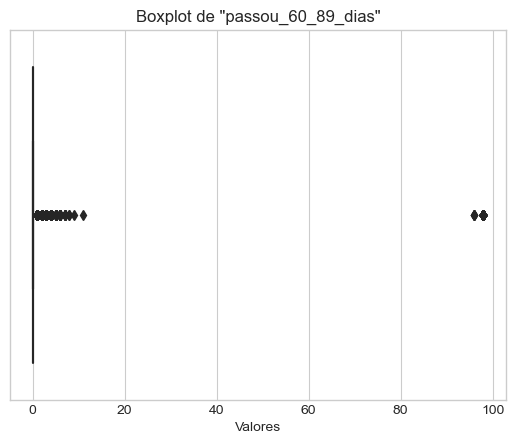

In [ ]:
ax = sns.boxplot(x='passou_60_89_dias', data = treino, color='green')
plt.title('Boxplot de "passou_60_89_dias"')
plt.xlabel('Valores')
plt.show()

In [ ]:
treino.passou_60_89_dias.value_counts()

0     104466
1       4169
2        825
3        222
98       198
4         67
5         26
6         12
7          7
96         4
8          2
11         1
9          1
Name: passou_60_89_dias, dtype: int64

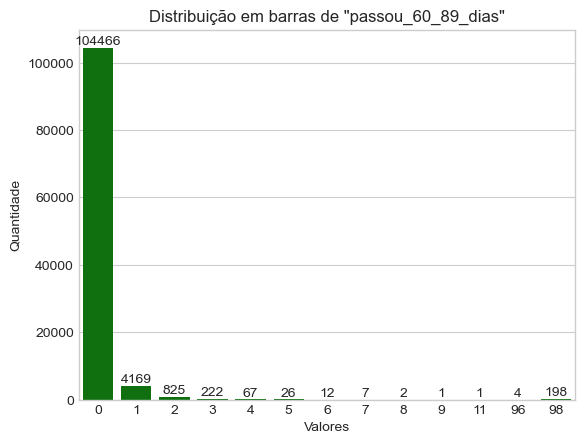

In [ ]:
ax = sns.countplot(x='passou_60_89_dias', data = treino, color='green')
ax.bar_label(ax.containers[0]);
plt.title('Distribuição em barras de "passou_60_89_dias"')
plt.xlabel('Valores')
plt.ylabel('Quantidade')
plt.show()

### `passou_90_dias`

Número de vezes que o tomador passou mais de 90 dias em atraso. Número inteiro.

In [ ]:
treino.passou_90_dias.describe()

count    110000.000000
mean          0.269955
std           4.217326
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: passou_90_dias, dtype: float64

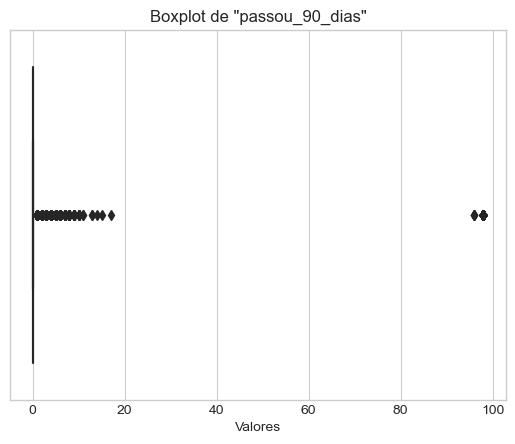

In [ ]:
ax = sns.boxplot(x='passou_90_dias', data = treino, color='green')
plt.title('Boxplot de "passou_90_dias"')
plt.xlabel('Valores')
plt.show()

In [ ]:
treino.passou_90_dias.value_counts()

0     103836
1       3886
2       1160
3        486
4        204
98       198
5        103
6         58
7         21
8         16
9         15
10         6
96         4
11         2
13         2
15         1
14         1
17         1
Name: passou_90_dias, dtype: int64

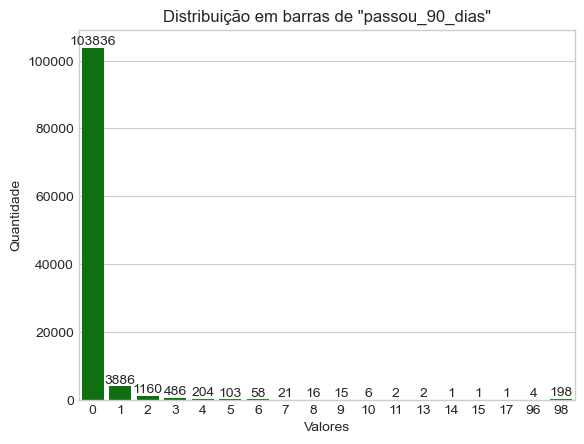

In [ ]:
ax = sns.countplot(x='passou_90_dias', data = treino, color='green')
ax.bar_label(ax.containers[0]);
plt.title('Distribuição em barras de "passou_90_dias"')
plt.xlabel('Valores')
plt.ylabel('Quantidade')
plt.show()

## Relação de Variáveis

Aqui vamos encontrar algumas relações entre as variáveis, como a matriz de correlação entre as variáveis duas a duas, além disso, comentar algumas coisas que podem ser discutidos a partir das visualizações na seção anterior.

### Correlação

Aqui será plotado uma mapa de calor da correlação entre as variáveis.

<AxesSubplot:>

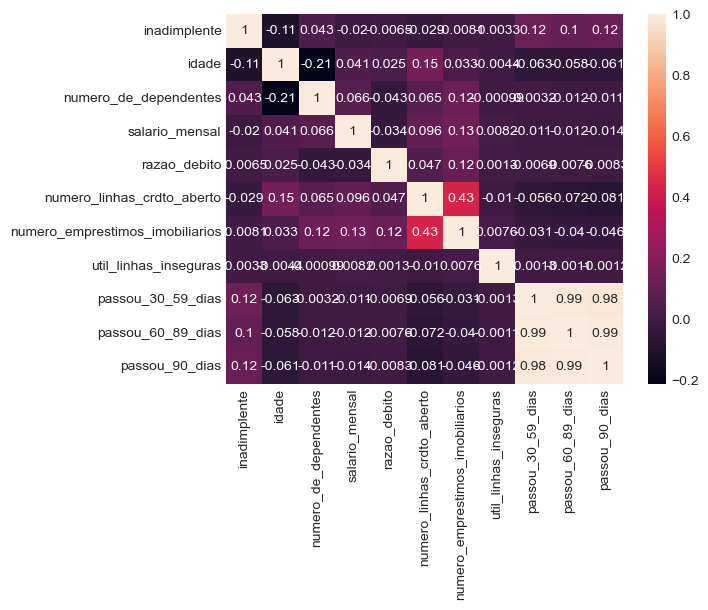

In [ ]:
sns.heatmap(treino.corr(), annot=True)

#### `passou_30_59_dias`, `passou_60_89_dias` e `passou_90_dias`

Pode-se observar que as variáveis `passou_30_59_dias`, `passou_60_89_dias` e `passou_90_dias` apresentam uma correlação quase perfeita, com um coeficiente de correlação próximo a 1. Podemos supor que essas variáveis estão altamente correlacionadas entre si, o que não é inesperado. No entanto, para examinar essa suposição, verificaremos algumas entradas com os valores "96" e "98" em cada uma dessas variáveis. Isso se deve ao fato de que há exatamente o mesmo número de ocorrências desses valores em cada uma das três variáveis como indicado pelo gráfico de barras correspondente e no caso de "98" há um número considerável de clientes.

In [ ]:
treino[treino.passou_90_dias==96]

,inadimplente,idade,numero_de_dependentes,salario_mensal,razao_debito,numero_linhas_crdto_aberto,numero_emprestimos_imobiliarios,util_linhas_inseguras,passou_30_59_dias,passou_60_89_dias,passou_90_dias
41944,1,26,0.0,NaN,0.000000,0,0,1.0,96,96,96
69478,1,33,0.0,4100.0,0.008047,0,0,1.0,96,96,96
84167,1,29,2.0,2800.0,0.000000,0,0,1.0,96,96,96
94106,1,34,1.0,3500.0,0.000000,0,0,1.0,96,96,96


In [ ]:
treino[treino.passou_90_dias==98]

,inadimplente,idade,numero_de_dependentes,salario_mensal,razao_debito,numero_linhas_crdto_aberto,numero_emprestimos_imobiliarios,util_linhas_inseguras,passou_30_59_dias,passou_60_89_dias,passou_90_dias
1733,1,27,0.0,2700.0,0.000000,0,0,1.0,98,98,98
2286,0,22,0.0,NaN,0.000000,0,0,1.0,98,98,98
3884,0,38,0.0,NaN,12.000000,0,0,1.0,98,98,98
4417,0,21,0.0,0.0,0.000000,0,0,1.0,98,98,98
4705,0,21,0.0,2000.0,0.000000,0,0,1.0,98,98,98
...,...,...,...,...,...,...,...,...,...,...,...
108240,1,48,2.0,2000.0,0.000000,0,0,1.0,98,98,98
109067,1,25,0.0,NaN,22.000000,0,0,1.0,98,98,98
109194,0,22,0.0,NaN,0.000000,0,0,1.0,98,98,98
109249,1,55,0.0,2600.0,0.008074,0,0,1.0,98,98,98


É intrigante notar que, para cada uma das entradas acima, os valores dos atributos mencionados são idênticos, ainda mais quando apresentam valores extremamente discrepantes em relação ao restante dos dados (ou seja, outliers). Uma possível explicação para esse fato é uma relação de inclusão, em que o atraso no pagamento acima de 90 dias é considerado um atraso que entraria nos três atributos de atraso. Isso implicaria em `passou_30_59_dias` $\geq$ `passou_60_89_dias` $\geq$ `passou_90_dias`. 

No entanto, há várias evidências que indicam a falta de uma relação de inclusão entre esses atributos, sugerindo que são mutuamente exclusivos. Isso pode ser exemplificado nos dados apresentados abaixo:

In [ ]:
treino[treino.passou_90_dias > treino.passou_60_89_dias]

,inadimplente,idade,numero_de_dependentes,salario_mensal,razao_debito,numero_linhas_crdto_aberto,numero_emprestimos_imobiliarios,util_linhas_inseguras,passou_30_59_dias,passou_60_89_dias,passou_90_dias
2,0,38,0.0,3042.0,0.085113,2,0,0.658180,1,0,1
13,1,40,2.0,13700.0,0.382965,9,1,0.964673,3,1,3
49,0,70,0.0,6900.0,0.256340,21,1,0.000080,0,0,1
68,0,31,2.0,2000.0,0.111444,6,0,0.004264,0,0,1
72,0,56,0.0,6793.0,0.369591,15,1,0.827708,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
109902,0,43,1.0,8200.0,0.079015,7,0,0.122732,0,0,1
109922,0,72,0.0,3072.0,0.427270,5,1,0.909341,2,0,1
109951,0,36,0.0,NaN,64.000000,1,0,0.867566,1,0,1
109961,0,46,2.0,11957.0,0.359090,8,2,0.985372,0,0,1


Consequentemente, os casos em questão são altamente discrepantes e, apesar de possíveis, são extremamente improváveis. Portanto, durante a preparação dos dados, podem ser tratados para evitar que o modelo seja influenciado por valores tão atípicos.

Com o intuito de visualizar o impacto dos outliers nos resultados, iremos plotar novamente a matriz de correlação, porém, dessa vez sem a presença desses valores discrepantes.

<AxesSubplot:>

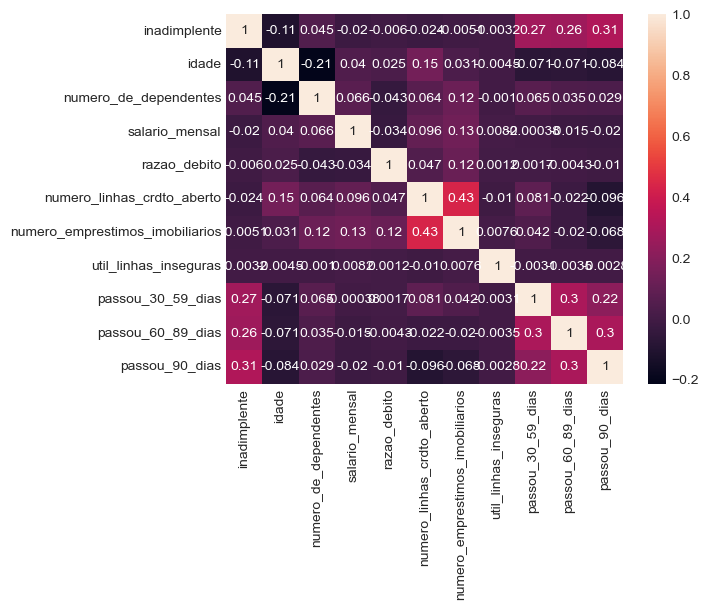

In [ ]:
df = treino[treino.passou_30_59_dias < 90].copy()
sns.heatmap(df.corr(), annot=True)

Diminuiu consideravalmente a correlação entre as três últimas variáveis. No entanto, por ainda terem a uma correlação considerável, o que pode ser nocivo para o modelo, e assumindo que são mutuamente exclusivos, vamos criar uma nova variável `passou_30_dias` na qual o cliente atrasou o pagamento do empréstimo em mais de 30 dias e será a soma das outras três variáveis, de forma a agregar informações em um só atributo.

In [ ]:
df['passou_30_dias'] = df.passou_30_59_dias + df.passou_60_89_dias + df.passou_90_dias
df.drop(['passou_30_59_dias', 'passou_60_89_dias', 'passou_90_dias'], axis=1, inplace=True)
df

,inadimplente,idade,numero_de_dependentes,salario_mensal,razao_debito,numero_linhas_crdto_aberto,numero_emprestimos_imobiliarios,util_linhas_inseguras,passou_30_dias
0,1,45,2.0,9120.0,0.802982,13,6,0.766127,2
1,0,40,1.0,2600.0,0.121876,4,0,0.957151,0
2,0,38,0.0,3042.0,0.085113,2,0,0.658180,2
3,0,30,0.0,3300.0,0.036050,5,0,0.233810,0
4,0,49,0.0,63588.0,0.024926,7,1,0.907239,1
...,...,...,...,...,...,...,...,...,...
109995,0,59,0.0,9600.0,0.448912,10,2,0.137396,1
109996,0,46,4.0,12224.0,0.491288,19,4,0.276964,0
109997,0,43,2.0,12000.0,0.382635,13,2,0.181257,0
109998,0,86,1.0,7000.0,0.248107,14,2,0.037699,0


<AxesSubplot:>

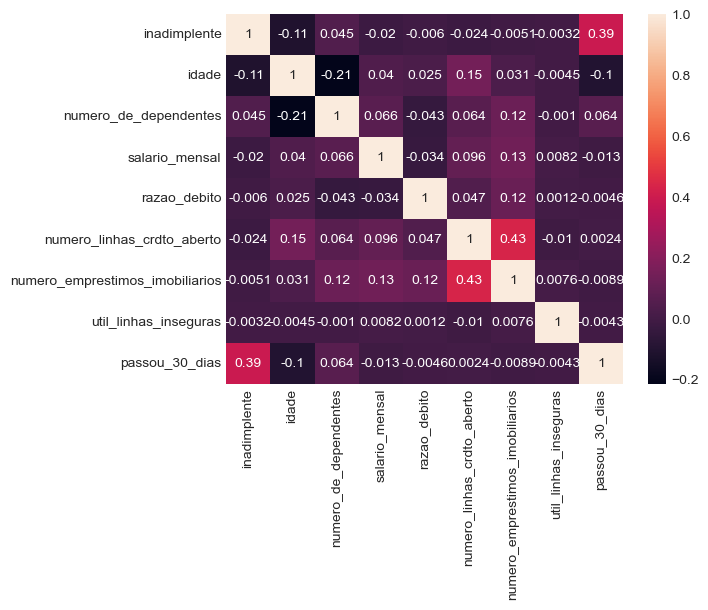

In [ ]:
sns.heatmap(df.corr(), annot=True)

Analisando a matriz vemos que a correlação entre a nova variável e a variável alvo possui uma correlação maior que as outras variáveis separadamente.

Outra suposição que pode ser feita é que a variável `numero_emprestimos_imobiliarios` está contida em `numero_linhas_crdto_aberto` e é corroborado pela alta correlação de ambas e pelo seguinte código:

In [ ]:
treino[treino.numero_emprestimos_imobiliarios > treino.numero_linhas_crdto_aberto]

,inadimplente,idade,numero_de_dependentes,salario_mensal,razao_debito,numero_linhas_crdto_aberto,numero_emprestimos_imobiliarios,util_linhas_inseguras,passou_30_59_dias,passou_60_89_dias,passou_90_dias


Ou seja, não há um dado de entrada sequer que comprove que ambas variáveis possam ter naturezas diferentes. E pela própria descrição de ambas é possível supor que há uma relação de pertencimento. Na seção de preparação dos dados será excluída a coluna `numero_emprestimos_imobiliarios` pois variáveis com muita correlação podem ser nocivas para o modelo, além de que possui correlação quase nula com o atributo alvo.

-----
# Preparação dos Dados

Nessa seção iremos preparar os dados para que possam alimentar os modelos que serão treinados. Aqui será feito tratamento com outliers, dados duplicados, dados correlacionados, ausentes e o tratamento com dados desbalanceados. O objetivo é tornar os dados o mais ideal possível para o modelo mas de forma que ainda reflita os dados reais que o modelo se depararia numa situação real.

## Divisão Treino-Teste

Primeiramente será feita a divisão entre conjunto de treino e conjunto de teste, como o arquivo "teste.csv" não possui variável alvo, não é possível utilizá-lo para medir o desempenho dos modelos. Portanto, a partir do arquivo "treino.csv" será extraido o conjunto de treino e o conjunto de teste para treinar e avaliar o modelo, para dai então submeter a previsão para o arquivo teste.

Além disso, essa divisão deve ser feita antes do tratamento dos dados para que não haja "data leakage" que seria o vazamento de informações do conjunto de teste para o modelo, uma vez que o conjunto de teste devem representar dados nunca vistos antes pelo modelo, com risco de ter overfitting.

In [ ]:
y = treino.inadimplente
X = treino.drop('inadimplente', axis=1)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=21)

Avaliando se houve uma divisão razoável entre os clientes que são inadimplentes entre os conjuntos de treino e teste:

In [ ]:
y_treino.sum()/len(y_treino), y_teste.sum()/len(y_teste)

(0.06687012987012987, 0.06612121212121212)

Houve uma boa divisão entre o conjunto de treino e de teste das entradas com o valor "1" para a variável `inadimplente`.

## Dados Duplicados

Existem algumas entradas que podem parecer duplicadas, porém, não é possível afirmar com certeza que se tratam de dados duplicados, uma vez que nenhum atributo representa uma forma de identificação de cada pessoa, então é possível que dois ou mais clientes possuam os mesmos atributos, mesmo que pareça improvável.

## Correlação

Realizaremos operações de transformação nos dados, incluindo a agregação das variáveis que representam atrasos em pagamentos de empréstimos e a exclusão da coluna `numero_emprestimos_imobiliarios`, conforme mencionado anteriormente.

In [ ]:
X_treino['passou_30_dias'] = X_treino.passou_30_59_dias + X_treino.passou_60_89_dias + X_treino.passou_90_dias
X_treino.drop(['passou_30_59_dias', 'passou_60_89_dias', 'passou_90_dias','numero_emprestimos_imobiliarios'], axis=1, inplace=True)

## Outliers

Ainda que o conjunto de dados apresente muitos valores discrepantes em quase todas as variáveis, não será realizado nenhum procedimento para tratar esses valores, uma vez que serão utilizados apenas modelos baseados em árvores de decisão, os quais são menos impactados pela presença de outliers. Contudo, é importante destacar que, para a maioria dos modelos de machine learning, é essencial realizar o tratamento dos outliers.

## Dados ausentes

Nesta etapa, será realizada a imputação dos valores ausentes do conjunto de dados. Para isso, será utilizada a técnica dos k-vizinhos mais próximos, na qual para uma entrada que há valor ausente é definido os k vizinhos mais próximos, ou seja, aqueles que possuam maior semelhança em relação aos outros atributos. Após definidos, é calculado a média da variável ausente desse vizinhos para que seja determinada a feature da entrada ausente. Essa técnica é escolhida porque permite a imputação de valores de forma mais precisa, levando em consideração as características dos dados vizinhos, adicionando variabilidade e diminuindo o vies do conjunto.

In [ ]:
X_treino.isnull().sum()

idade                             0
numero_de_dependentes          2032
salario_mensal                15267
razao_debito                      0
numero_linhas_crdto_aberto        0
util_linhas_inseguras             0
passou_30_dias                    0
dtype: int64

Como o método se utiliza de distâncias euclidianas, é necessário que os dados sejam padronizados para que todos possuam o mesmo peso na decisão da média. Utilizaremos o MinMaxScaler que padroniza os dados entre 0 e 1.

In [ ]:
scaler = MinMaxScaler()
X_treino = pd.DataFrame(scaler.fit_transform(X_treino), columns = X_treino.columns)

Agora é aplicado o impute dos k-vizinhos mais próximos. Aqui o valor escolhido para k foi 2. 

In [ ]:
imputer = KNNImputer(n_neighbors=2, weights='distance')
X_imputado = pd.DataFrame(imputer.fit_transform(X_treino), columns = X_treino.columns)
X_treino = pd.DataFrame(scaler.inverse_transform(X_imputado), columns = X_imputado.columns)

## Dados Desbalanceados

Como mencionado anteriormente, esse é um problema de desbalanceamento de dados, em que uma classe é significativamente mais prevalente do que a outra. Portanto, é necessário aplicar técnicas de balanceamento para que os modelos não deem preferência à classe dominante e possam aprender a reconhecer padrões na classe minoritária.

Embora modelos baseados em árvores de decisão sejam menos impactados pelo desbalanceamento de dados em comparação com outros modelos de machine learning, é importante realizar um tratamento adequado para garantir que os resultados sejam mais robustos e confiáveis. Assim, adotaremos uma estratégia de balanceamento de classes para lidar com o problema de desbalanceamento dos dados antes de treinar o modelo.

Nesta etapa foi aplicada uma técnica de amostragem chamada SMOTE (Synthetic Minority Over-sampling Technique), a qual tem como objetivo gerar dados artificiais para a classe minoritária com base nos dados existentes. Também foi utilizada a técnica de undersampling, que consiste em remover aleatoriamente amostras da classe majoritária. A combinação dessas técnicas tem como finalidade gerar um conjunto de dados mais equilibrado para o treinamento do modelo.

In [ ]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_treino_balanceado, y_treino_balanceado = pipeline.fit_resample(X_treino, y_treino)

In [ ]:
y_treino_balanceado.sum() / len(y_treino_balanceado)

0.3333333333333333

Podemos ver que agora há uma proporção considerável de entradas da classe minoritária.

----------
# Modelagem

Agora os dados do conjunto de treino foram pré-processados e estão prontos para serem utilizados como entrada para modelos de machine learning baseados em árvores de decisão pois são conhecidos por sua boa performance em problemas de classificação e possuem uma alta capacidade de interpretabilidade, o que permite a identificação dos atributos mais relevantes para a classificação dos dados. Optamos por utilizar dois modelos diferentes: Floresta Aleatória e XGBoost.

* *Matriz de confusão*: é uma tabela que permite a visualização das classificações corretas e incorretas de um modelo de classificação em relação às classes reais. Ela é composta por quatro elementos: verdadeiros positivos (TP), falsos positivos (FP), verdadeiros negativos (TN) e falsos negativos (FN), e a partir desses elementos é possível calcular outras métricas de avaliação.

* *Acurácia*: é a medida de quão próximo o modelo está de classificar corretamente todas as observações. É calculada pela divisão do número de previsões corretas pelo número total de observações. No entanto, a acurácia pode não ser uma métrica adequada para avaliar modelos em casos de desbalanceamento de classes, que é o nosso caso, portanto, não será levada em consideração.

* *Precision*: é a proporção de verdadeiros positivos em relação ao total de observações previstas como positivas. É uma métrica útil quando o objetivo é minimizar os falsos positivos, ou seja, quando a classificação incorreta da classe positiva tem um custo elevado.

* *Recall*: é a proporção de verdadeiros positivos em relação ao total de observações que realmente pertencem à classe positiva. É uma métrica útil quando o objetivo é minimizar os falsos negativos, ou seja, quando a classificação incorreta da classe negativa tem um custo elevado. Aqui nos preocuparemos mais com essa, pois a classificação de um Falso Negativo é elevada, ou seja, classificar alguém inadimplente como adimplente.

* *F1 Score*: é a média harmônica entre precision e recall. É uma métrica útil quando se deseja um equilíbrio entre minimizar falsos positivos e falsos negativos. Será considerada também devido ao equilíbrio.

Nesta seção, definimos uma função que permite aplicar as mesmas transformações realizadas no conjunto de treino ao conjunto de teste, garantindo que ambos os conjuntos tenham as mesmas características e possam ser usados nos modelos de machine learning sem problemas de compatibilidade.

In [ ]:
def transforma_teste(X_teste, scaler=scaler, imputer=imputer):
    
    # Manipulação de features
    X_teste['passou_30_dias'] = X_teste.passou_30_59_dias + X_teste.passou_60_89_dias + X_teste.passou_90_dias
    X_teste.drop(['passou_30_59_dias', 'passou_60_89_dias', 'passou_90_dias','numero_emprestimos_imobiliarios'], axis=1, inplace=True)
    
    # Impute de valores ausentes com scale antes e depois
    X_teste = pd.DataFrame(scaler.transform(X_teste), columns = X_teste.columns)
    X_teste_imputado = pd.DataFrame(imputer.transform(X_teste), columns = X_teste.columns)
    X_teste = pd.DataFrame(scaler.inverse_transform(X_teste_imputado), columns = X_teste_imputado.columns)
    
    return X_teste

In [ ]:
X_teste = transforma_teste(X_teste, scaler=scaler, imputer=imputer)

## Floresta Aleatória

O modelo de Floresta Aleatória (Random Forest) é composto por várias árvores de decisão independentes que são treinadas em subconjuntos aleatórios do conjunto de dados de treinamento. Durante a previsão, cada árvore de decisão na floresta vota na sua previsão e a classe com mais votos é selecionada como a previsão final.

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_treino_balanceado, y_treino_balanceado)
teste_pred = rfc.predict(X_teste)
print(confusion_matrix(y_teste, teste_pred), '\n')
print('Acurácia: ', round(metrics.accuracy_score(y_teste, teste_pred) * 100, 2))
print('Precision: ', round(metrics.precision_score(y_teste, teste_pred) * 100, 2))
print('Recall: ', round(metrics.recall_score(y_teste, teste_pred) * 100, 2))
print('F1: ', round(metrics.f1_score(y_teste, teste_pred) * 100, 2))

[[27728  3090]
 [  895  1287]] 

Acurácia:  87.92
Precision:  29.4
Recall:  58.98
F1:  39.24


Obteve um recall considerável, um precision baixo e portanto um F1 Score não muito bom.

## XGBoost

XGBoost usa um algoritmo de boosting para combinar vários modelos de árvore de decisão fracos em um modelo forte. O algoritmo utiliza um conjunto de dados de treinamento para ajustar vários modelos de árvores de decisão consecutivamente e ajusta os pesos das instâncias para lidar com o desbalanceamento de classes.

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_treino_balanceado, y_treino_balanceado)
teste_pred = xgb.predict(X_teste)
print(confusion_matrix(y_teste, teste_pred), '\n')
print('Acurácia: ', round(metrics.accuracy_score(y_teste, teste_pred) * 100, 2))
print('Precision: ', round(metrics.precision_score(y_teste, teste_pred) * 100, 2))
print('Recall: ', round(metrics.recall_score(y_teste, teste_pred) * 100, 2))
print('F1: ', round(metrics.f1_score(y_teste, teste_pred) * 100, 2))

[[27822  2996]
 [  919  1263]] 

Acurácia:  88.14
Precision:  29.65
Recall:  57.88
F1:  39.22


Resultados semelhantes ao modelo anterior.

# Melhorias

Nesta etapa, serão realizadas melhorias nos modelos. Para tal, iniciaremos avaliando qual modelo obteve melhor desempenho utilizando as métricas Recall e F1-Score. Em seguida, utilizaremos a técnica chamada fine tuning, a qual consiste em buscar os melhores hiperparâmetros para os modelos com o objetivo de melhorar seu desempenho.

## Melhor modelo

Aqui vamos rodar 10 vezes cada modelo, alterando apenas a divisão de conjuntos de treino e teste para determinar qual dos dois modelos obtém melhor desempenho:

In [ ]:
xgb = XGBClassifier()
rfc = RandomForestClassifier()
modelos = [xgb, rfc]
xgb_recall = []
xgb_f1score = []
rfc_recall = []
rfc_fscore = []

In [ ]:
for i in range(10):
    
    # Split treino-teste
    y = treino.inadimplente
    X = treino.drop('inadimplente', axis=1)
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=(40 + i))
    
    # Features
    X_treino['passou_30_dias'] = X_treino.passou_30_59_dias + X_treino.passou_60_89_dias + X_treino.passou_90_dias
    X_treino.drop(['passou_30_59_dias', 'passou_60_89_dias', 'passou_90_dias','numero_emprestimos_imobiliarios'], axis=1, inplace=True)
    
    # Scale
    scaler = MinMaxScaler()
    X_treino = pd.DataFrame(scaler.fit_transform(X_treino), columns = X_treino.columns)
    
    # Impute de missing
    imputer = KNNImputer(n_neighbors=2, weights='distance')
    X_imputado = pd.DataFrame(imputer.fit_transform(X_treino), columns = X_treino.columns)
    X_treino = pd.DataFrame(scaler.inverse_transform(X_imputado), columns = X_imputado.columns)
    
    # SMOTE
    j = (np.random.randint(0, 6) / 100) + 0.1
    over = SMOTE(sampling_strategy=j)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    X_treino_balanceado, y_treino_balanceado = pipeline.fit_resample(X_treino, y_treino)
    
    # Transform no teste
    X_teste = transforma_teste(X_teste, scaler=scaler, imputer=imputer)
    
    # Treinamento
    for modelo in modelos:
        modelo.fit(X_treino_balanceado, y_treino_balanceado)
        teste_pred = modelo.predict(X_teste)
        
        if modelo == xgb:
            xgb_recall.append(round(metrics.recall_score(y_teste, teste_pred) * 100, 2))
            xgb_f1score.append(round(metrics.f1_score(y_teste, teste_pred) * 100, 2))
            
        else:
            rfc_recall.append(round(metrics.recall_score(y_teste, teste_pred) * 100, 2))
            rfc_fscore.append(round(metrics.f1_score(y_teste, teste_pred) * 100, 2))

Vamos ver as médias de cada métrica para cada modelo:

In [ ]:
print("Floresta Aleatória: ")
print("Média do Recall: {}".format(np.array(rfc_recall).mean()))
print("Média do F1-Score: {} \n".format(np.array(rfc_fscore).mean()))
print("XGBoost: ")
print("Média do Recall: {}".format(np.array(xgb_recall).mean()))
print("Média do F1-Score: {} \n".format(np.array(xgb_f1score).mean()))

Floresta Aleatória: 
Média do Recall: 53.649
Média do F1-Score: 40.138 

XGBoost: 
Média do Recall: 52.104
Média do F1-Score: 40.63100000000001 



Como a floresta aleatória obteve um melhor resultado no Recall e teve um F1-Score pouquíssimo abaixo, será o modelo levado adiante para o Fine Tuning.

## Fine tuning

Aqui seguiremos com o modelo de Floresta Aleatória com o propósito de determinar os valores ótimos dos hiperparâmetros do modelo. Para tanto, será empregada a técnica de Random Grid Search em conjunto com a validação cruzada.

In [ ]:
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
max_features = ['log2', 'sqrt', None]
class_weight = [{0:1, 1:1}, {0:2, 1:1}, {0:1, 1:2}]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'class_weight': class_weight}

In [ ]:
rfc = RandomForestClassifier()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rfc_random.fit(X_treino_balanceado, y_treino_balanceado)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'class_weight': [{0: 1, 1: 1},
                                                         {0: 2, 1: 1},
                                                         {0: 1, 1: 2}],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['log2', 'sqrt', None],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

A partir do algoritmo é possível determinar hiperpâmetros subótimos para o modelo de Floresta Aleatória:

In [ ]:
rfc_random.best_params_

{'n_estimators': 300,
 'max_features': 'sqrt',
 'max_depth': 70,
 'class_weight': {0: 2, 1: 1}}

Vamos utilizar esses hiperparâmetros e avaliar o modelo no conjunto de teste: 

In [ ]:
rfc = RandomForestClassifier(n_estimators = 300, max_features = 'sqrt', max_depth = 70, class_weight = {0: 2, 1: 1})
rfc.fit(X_treino_balanceado, y_treino_balanceado)
teste_pred = rfc.predict(X_teste)
print(confusion_matrix(y_teste, teste_pred), '\n')
print('Acurácia: ', round(metrics.accuracy_score(y_teste, teste_pred) * 100, 2))
print('Precision: ', round(metrics.precision_score(y_teste, teste_pred) * 100, 2))
print('Recall: ', round(metrics.recall_score(y_teste, teste_pred) * 100, 2))
print('F1: ', round(metrics.f1_score(y_teste, teste_pred) * 100, 2))

[[27882  2956]
 [  913  1249]] 

Acurácia:  88.28
Precision:  29.7
Recall:  57.77
F1:  39.23


É possível reparar que não houve tanto ganho no recall com esses hiperparâmetros. Entretanto, utilizaremos exatamente esses valores para submeter a coluna `inadimplente` do arquivo "teste.csv".

----------
# Submissão

Vamos utilizar todo o conjunto "treino.csv" para treinar o modelo. Fazendo o pré-processamento:

In [ ]:
X_treino = treino.drop('inadimplente', axis=1)
y_treino = treino.inadimplente

X_treino['passou_30_dias'] = X_treino.passou_30_59_dias + X_treino.passou_60_89_dias + X_treino.passou_90_dias
X_treino.drop(['passou_30_59_dias', 'passou_60_89_dias', 'passou_90_dias','numero_emprestimos_imobiliarios'], 
              axis=1, inplace=True)

scaler = MinMaxScaler()
X_treino = pd.DataFrame(scaler.fit_transform(X_treino), columns = X_treino.columns)

imputer = KNNImputer(n_neighbors=2, weights='distance')
X_imputado = pd.DataFrame(imputer.fit_transform(X_treino), columns = X_treino.columns)
X_treino = pd.DataFrame(scaler.inverse_transform(X_imputado), columns = X_imputado.columns)

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_treino_balanceado, y_treino_balanceado = pipeline.fit_resample(X_treino, y_treino)

Agora vamos aplicar a transformação no conjunto de teste:

In [ ]:
def transforma_teste(teste, scaler=scaler, imputer=imputer):
    
    X_teste = teste.copy()
    
    # Manipulação de features
    X_teste['passou_30_dias'] = X_teste.passou_30_59_dias + X_teste.passou_60_89_dias + X_teste.passou_90_dias
    X_teste.drop(['passou_30_59_dias', 'passou_60_89_dias', 'passou_90_dias','numero_emprestimos_imobiliarios'], axis=1, inplace=True)
    
    # Impute de valores ausentes com scale antes e depois
    X_teste = pd.DataFrame(scaler.transform(X_teste), columns = X_teste.columns)
    X_teste_imputado = pd.DataFrame(imputer.transform(X_teste), columns = X_teste.columns)
    X_teste = pd.DataFrame(scaler.inverse_transform(X_teste_imputado), columns = X_teste_imputado.columns)
    
    return X_teste, teste

In [ ]:
X_teste, teste = transforma_teste(teste, scaler=scaler, imputer=imputer)

Aplicando agora no conjunto de teste modificado e adicionando a coluna de previsão em "teste.csv" temos:

In [ ]:
# Treinamento do modelo e previsão
rfc = RandomForestClassifier(n_estimators = 300, max_features = 'sqrt', max_depth = 70, class_weight = {0: 2, 1: 1})
rfc.fit(X_treino_balanceado, y_treino_balanceado)
teste_pred = rfc.predict(X_teste)

# Adição da coluna de previsão
teste['inadimplente'] = teste_pred

In [ ]:
teste

,idade,numero_de_dependentes,salario_mensal,razao_debito,numero_linhas_crdto_aberto,numero_emprestimos_imobiliarios,util_linhas_inseguras,passou_30_59_dias,passou_60_89_dias,passou_90_dias,inadimplente
0,62,0.0,8180.0,0.081775,3,2,0.025849,0,0,0,0
1,55,0.0,2200.0,0.153112,3,0,0.667083,0,0,0,0
2,44,0.0,7499.0,0.148800,20,1,0.007093,0,0,0,0
3,54,0.0,5900.0,0.351635,15,1,0.091213,0,1,0,0
4,54,0.0,2167.0,0.065959,3,0,0.112680,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
39995,68,0.0,10833.0,0.062858,9,0,0.000000,1,0,1,1
39996,84,0.0,8456.0,0.013598,7,0,0.061117,0,0,0,0
39997,70,0.0,6000.0,0.663056,17,2,0.817745,0,0,0,0
39998,64,0.0,5045.0,0.865438,12,4,0.106139,2,0,0,1


Agora basta apenas salvar em um arquivo .csv e chegamos ao fim da análise exploratória e modelagem.

In [ ]:
teste.to_csv('teste_submissao.csv')